In [1]:
import numpy as np

Text(0,0.5,'$\\arctan{\\theta}$')

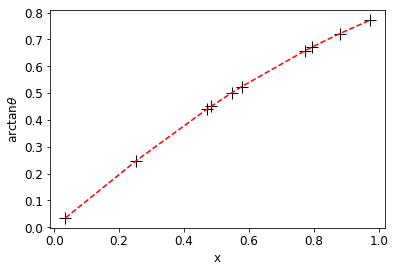

In [2]:
%matplotlib inline   
# 在当前页面画图
#%pylab   
# 在弹出窗口画图

import matplotlib  
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)   # 修改x,y坐标大小

x = np.random.rand(10)   # 10个随机数
x = np.sort(x)   # 从小到大排序
y = np.arctan(x)   # 反正切函数

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'k+', markersize=12)
ax.plot(x, y, 'r--')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel(r'$\arctan{\theta}$', fontsize=12)
#fig.show()

Text(0.5,0,'$y$')

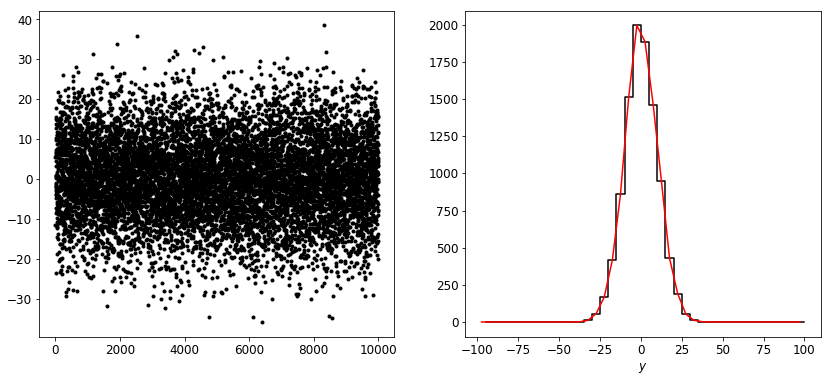

In [3]:
x = np.random.normal(0., 10., size=10000)   
# 10000个正态分布随机数，中心值为0，弥散为10

xgrid = np.arange(-100,105,5)    # 要画图的格子
xcenter = (xgrid[1:]+xgrid[:-1])/2.   # 格子的中心
hx, xedge = np.histogram(x, bins=xgrid)   # 直方图

fig = plt.figure(figsize=[14,6])   # 设置大小
ax = fig.add_subplot(121)   # 1行2列第1个位置
ax.plot(x, 'k.')

ax = fig.add_subplot(122)   # 1行2列第2个位置
ax.step(xedge[1:], hx, 'k-')
ax.plot(xcenter, hx, 'r-')
ax.set_xlabel(r'$y$', fontsize=12)
#fig.show()

escape 0.078 sec


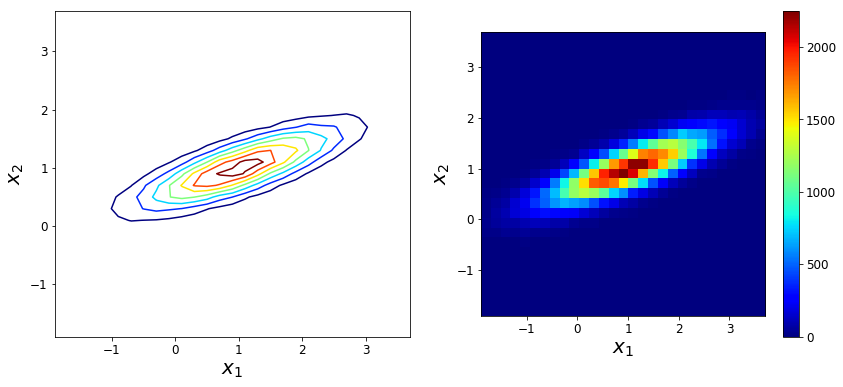

In [4]:
import scipy.stats as stats   # 统计包
import time   # 计时器

start = time.time()
mu = np.array([1., 1.])   # 中心位置
s1 = 1   # sigma1^2=1
s2 = 0.2   #sigma2^2=0.2
rho = 0.8   # 相关系数0.8
sig = np.array([[s1, rho*np.sqrt(s1*s2)],[rho*np.sqrt(s1*s2), s2]])
# 协方差矩阵sigma

# generate random numbers from 2D normal distribution
xx = np.random.multivariate_normal(mu, sig, 100000)   
# 100000个多元正态分布随机数，中心位置为mu，协方差矩阵为sigma
xgrid = np.arange(-2., 4., 0.2)   # x方向网格
ygrid = np.arange(-2., 4., 0.2)   # y方向网格
xcenter = (xgrid[0:-1]+xgrid[1:])/2
ycenter = (ygrid[0:-1]+ygrid[1:])/2   # 中心位置

# make 2d histogram
hxx, xedge, yedge = np.histogram2d(xx[:,0], xx[:,1], bins=[xgrid,ygrid])

fig = plt.figure(figsize=[14,6])
plt.set_cmap('jet')   # 
ax = fig.add_subplot(121)
ax.contour(xcenter, ycenter, hxx.T)
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

ax = fig.add_subplot(122)
e = ax.imshow(hxx.T, extent=[xcenter[0], xcenter[-1], ycenter[-1], ycenter[0]])
plt.colorbar(e)
ax.set_ylim([ycenter[0], ycenter[-1]])
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20)

#fig.show()
print('escape %(s).3f sec' % {'s':time.time()-start})